In [ ]:
!pip install torchtext==0.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 836.5 kB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.16.0
    Uninstalling torchtext-0.16.0:
      Successfully uninstalled torchtext-0.16.0


In [ ]:
!pip install skorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 3.8 MB/s eta 0:00:00


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.6 MB/s eta 0:00:00


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.4 MB/s eta 0:00:00


In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 6.6 MB/s eta 0:00:00


In [ ]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV , ShuffleSplit,RandomizedSearchCV

# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import torch
import spacy
# Preliminaries
from torchtext.data import Field, TabularDataset, BucketIterator

# Models
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

# Training
import torch.optim as optim

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,precision_score,f1_score,recall_score
import seaborn as sns

from spacy.lang.en.stop_words import STOP_WORDS
import nltk
nltk.download('punkt')
import string

from skorch import NeuralNetClassifier
from skorch import dataset

import optuna
from optuna.trial import TrialState

from datasets import load_dataset

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp /content/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d saurabhshahane/fake-news-classification

 87% 80.0M/92.1M [00:00<00:00, 161MB/s]
100% 92.1M/92.1M [00:00<00:00, 155MB/s]


In [ ]:
# Put on the same directory

# specifying the name of the zip file
file = "fake-news-classification.zip"

# open the zip file in read mode
with ZipFile(file, 'r') as zip:
    # list all the contents of the zip file
    zip.printdir()

    # extract all files
    print('extraction...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
WELFake_Dataset.csv                            2023-10-08 21:01:22    245086152
extraction...
Done!


In [ ]:
fake_data=pd.read_csv('/content/WELFake_Dataset.csv')
fake_data.head(5)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
len(fake_data)

72134

In [ ]:
fake_data.rename(columns={'label':'labels'},inplace = True)

<Axes: >

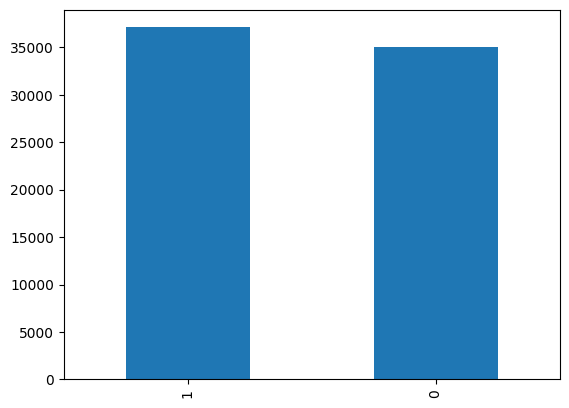

In [ ]:
fake_data['labels'].value_counts().plot.bar()

In [ ]:
fake_data.isnull().sum()

Unnamed: 0      0
title         558
text           39
labels          0
dtype: int64

In [ ]:
fake_data.fillna(' ',inplace=True)

In [ ]:
fake_data.isnull().sum()

Unnamed: 0    0
title         0
text          0
labels        0
dtype: int64

In [ ]:
fake_data.duplicated().sum()

0

In [ ]:
fake_data['text'] = fake_data['title'] + '\n ' + fake_data['text']
fake_data=fake_data[['text','labels']]
fake_data.head(5)

,text,labels
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
1,\n Did they post their votes for Hillary alre...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",0
4,SATAN 2: Russia unvelis an image of its terrif...,1


In [ ]:
for i in  range(len(fake_data.text)):
  fake_data.text[i]=fake_data.text[i].replace("\n"," ").strip()


<ipython-input-21-9e895cabce07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_data.text[i]=fake_data.text[i].replace("\n"," ").strip()


In [ ]:
fake_data.text[3]

'Bobby Jindal, raised Hindu, uses story of Christian conversion to woo evangelicals for potential 2016 bid  A dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled from Hinduism to Protestant Christianity and, ultimately, became what he calls an “evangelical Catholic.”  Over two hours, Jindal, 42, recalled talking with a girl in high school who wanted to “save my soul,” reading the Bible in a closet so his parents would not see him and feeling a stir while watching a movie during his senior year that depicted Jesus on the cross.  “I was struck, and struck hard,” Jindal told the pastors. “This was the Son of God, and He had died for our sins.”  Jindal’s session with the Christian clergy, who lead congregations in the early presidential battleground states of Iowa and South Carolina, was part of a behind-the-scenes effort by the Louisiana governor to 

In [ ]:
len(fake_data)

72134

In [ ]:
# use scikitlearn to split the data
train_data ,test_data =train_test_split(fake_data,test_size=0.2,random_state=42)
train_data.to_csv('train.csv',index=False)
test_data.to_csv('test.csv',index=False)

In [ ]:
print(train_data.text[0])

LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]  No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:3

In [ ]:
x_train ,y_train ,x_test, y_test=train_data['text'],train_data['labels'],test_data['text'],test_data['labels']

In [ ]:
train_data.shape ,test_data.shape

((57707, 2), (14427, 2))

In [ ]:


# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

In [ ]:
text_clf_nb.fit(x_train,y_train)
text_clf_nb.score(x_train,y_train),text_clf_nb.score(x_test,y_test)

(0.8825792364877745, 0.8684411173494143)

In [ ]:
text_clf_lsvc.fit(x_train,y_train)
text_clf_lsvc.score(x_train,y_train),text_clf_lsvc.score(x_test,y_test)

(0.9958237302233698, 0.9695016288902751)

In [ ]:
#add stopwords to tfidfVectorizer
# Naïve Bayes:with stop_words in tfidfVectorizer
text_clf_nb_sw = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                     ('clf', MultinomialNB()),
])

# Linear SVC:with stop_words in tfidfVectorizer
text_clf_lsvc_sw = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                     ('clf', LinearSVC()),
])


In [ ]:
text_clf_nb_sw.fit(x_train,y_train)
text_clf_nb_sw.score(x_train,y_train),text_clf_nb_sw.score(x_test,y_test)

(0.885611797528896, 0.870589866223054)

In [ ]:
text_clf_lsvc_sw.fit(x_train,y_train)
text_clf_lsvc_sw.score(x_train,y_train),text_clf_lsvc_sw.score(x_test,y_test)

(0.9960143483459546, 0.9647882442642268)

In [ ]:

params_NB = {'clf__alpha': np.linspace(0.5, 1.5, 6),
             'clf__fit_prior': [True, False], }

gs_NB = GridSearchCV(text_clf_nb_sw ,
                     params_NB,
                     cv=5,
                     verbose=1,
                     scoring='accuracy')


gs_NB.fit(x_train,y_train);
gs_NB.score(x_train,y_train),gs_NB.best_params_,gs_NB.score(x_test,y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


(0.8947094806522605,
 {'clf__alpha': 0.5, 'clf__fit_prior': True},
 0.8750953074097179)

In [ ]:
params_SV = {'clf__C': [0.1, 1, 10, 100],
    'clf__class_weight': ['balanced'] ,
             'clf__penalty':['l2'],
    'clf__loss': ['hinge', 'squared_hinge'],
             'clf__max_iter':[1200000]}
gs_SV = GridSearchCV(text_clf_lsvc_sw,
                     params_SV,
                     cv=5,
                     verbose=1,
                     scoring='accuracy')


gs_SV.fit(x_train,y_train);
gs_SV.score(x_train,y_train),gs_SV.best_params_,gs_SV.score(x_test,y_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


(0.9959623615852496,
 {'clf__C': 1,
  'clf__class_weight': 'balanced',
  'clf__loss': 'squared_hinge',
  'clf__max_iter': 1200000,
  'clf__penalty': 'l2'},
 0.9647882442642268)

In [ ]:
train_data.labels.value_counts()

1    29768
0    27939
Name: labels, dtype: int64

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
destination_folder='/content/'

In [ ]:
def load_data():
    # stopwords
    stop_words =STOP_WORDS
    punctuation=[pun for pun in string.punctuation]
    stop_words.update(punctuation)
    words=[' ','“','”','  ']
    stop_words.update(words)


    # Fields
    label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
    text_field = Field(tokenize='spacy',tokenizer_language='en_core_web_sm',
                      lower=True, include_lengths=True,
                      batch_first=True,stop_words=stop_words)
    fields = [ ('text', text_field),('labels', label_field)]

    # TabularDataset
    train, test = TabularDataset.splits(path='/content/', train='train.csv', test='test.csv',
                                              format='CSV', fields=fields, skip_header=True)

    # Iterators
    train_iter = BucketIterator(train, batch_size=32, sort_key=lambda x: len(x.text),
                                device=device, sort=True, sort_within_batch=True)
    test_iter = BucketIterator(test, batch_size=32, sort_key=lambda x: len(x.text),
                                device=device, sort=True, sort_within_batch=True)

    # Vocabulary
    text_field.build_vocab(train, min_freq=5)
    label_field.build_vocab(train)
    print("Size of text vocab:",len(text_field.vocab))
    print("most common vocab:",text_field.vocab.freqs.most_common(10))

    return train_iter, test_iter , text_field

In [ ]:
train_iter, test_iter , text_field=load_data()

Size of text vocab: 72003
most common vocab: [('trump', 187797), ('said', 186944), ('s', 140259), ('president', 74178), ('people', 73105), ('new', 63749), ('clinton', 61959), ('mr.', 57292), ('state', 52291), ('u.s.', 50927)]


In [ ]:
class RNN_net(nn.Module):
    def __init__(self, dimension=128,num_layers=2,dropout=0.5):
        super(RNN_net, self).__init__()

        # Embedding layer for text
        self.embedding = nn.Embedding(len(text_field.vocab), 300)
        self.dimension = dimension
        self.num_layers=num_layers
        self.dropout=dropout

        # First RNN layer
        self.RNN1 = nn.RNN(input_size=300, hidden_size=dimension, num_layers=num_layers,
                             batch_first=True, bidirectional=True)
        self.dropout1 = nn.Dropout(p=dropout)


        # Fully connected layer for final output
        self.fc = nn.Linear(2 * dimension, 1)

    def forward(self, text):
        # Embedding the text
        #print(f'Input: {list(text.shape)}')
        text_len = torch.tensor([len(seq) for seq in text], dtype=torch.int64)
        text_emb = self.embedding(text)

        # First RNN layer
        packed_input_1 = pack_padded_sequence(text_emb, text_len.to('cpu'), batch_first=True, enforce_sorted=False)
        packed_output_1, _ = self.RNN1(packed_input_1)
        output_1, _ = pad_packed_sequence(packed_output_1, batch_first=True)

        # Extracting the last forward and first backward outputs from the first LSTM layer
        last_forward_output_1 = output_1[range(len(output_1)), text_len - 1, :self.dimension]
        first_backward_output_1 = output_1[:, 0, self.dimension:]

        # Concatenating the forward and backward outputs
        concatenated_output_1 = torch.cat((last_forward_output_1, first_backward_output_1), 1)

        # Applying dropout after the first LSTM layer
        dropout_output_1 = self.dropout1(concatenated_output_1)



        text = self.fc(dropout_output_1 )
        text = torch.squeeze(text, 1)
        text_out = torch.sigmoid(text)
        #print(f'First block: {list(text_out.shape)}')

        return text_out


In [ ]:
def train(model, optimizer, criterion=nn.BCELoss(),
          train_loader=train_iter, valid_loader=test_iter,
          num_epochs=50, eval_every=len(train_iter) // 2,
          file_path=destination_folder, best_valid_loss=float("Inf")):

    train_loss_list = []
    valid_loss_list = []
    global_steps_list = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for batch_idx, data in enumerate(train_loader):
            optimizer.zero_grad()
            labels = data.labels.to(device)
            text = data.text[0].to(device)
            output = model(text)

            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if batch_idx % eval_every == 0 and batch_idx > 0:
                average_train_loss = running_loss / eval_every
                valid_running_loss = evaluate(model, criterion, valid_loader)
                average_valid_loss = valid_running_loss / len(valid_loader)

                train_loss_list.append(average_train_loss)
                valid_loss_list.append(average_valid_loss)
                global_steps_list.append(batch_idx + epoch * len(train_loader))

                print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx}/{len(train_loader)}], '
                      f'Train Loss: {average_train_loss:.4f}, Valid Loss: {average_valid_loss:.4f}')

                running_loss = 0.0

                if best_valid_loss > average_valid_loss:
                    best_valid_loss = average_valid_loss
                    save_checkpoint(file_path + '/model.pt', model, optimizer, best_valid_loss)
                    save_metrics(file_path + '/metrics.pt', train_loss_list, valid_loss_list, global_steps_list)

    save_metrics(file_path + '/metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    print('Finished Training!')

def evaluate(model, criterion, valid_loader):
    model.eval()
    valid_running_loss = 0.0

    with torch.no_grad():
        for batch_idx, data in enumerate(valid_loader):
            labels = data.labels.to(device)
            text = data.text[0].to(device)
            output = model(text)

            loss = criterion(output, labels)
            valid_running_loss += loss.item()
    model.train()
    return valid_running_loss


In [ ]:
def save_checkpoint(save_path, model, optimizer, valid_loss):
    if save_path is None:
        return

    state_dict = {
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'valid_loss': valid_loss
    }

    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')


def load_checkpoint(load_path, model, optimizer):
    if load_path is None:
        return

    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')

    model.load_state_dict(state_dict['model_state_dict'])
    optimizer.load_state_dict(state_dict['optimizer_state_dict'])

    return state_dict['valid_loss']


def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list):
    if save_path is None:
        return

    state_dict = {
        'train_loss_list': train_loss_list,
        'valid_loss_list': valid_loss_list,
        'global_steps_list': global_steps_list
    }

    torch.save(state_dict, save_path)
    print(f'Metrics saved to ==> {save_path}')


def load_metrics(load_path):
    if load_path is None:
        return

    state_dict = torch.load(load_path, map_location=device)
    print(f'Metrics loaded from <== {load_path}')

    return (
        state_dict['train_loss_list'],
        state_dict['valid_loss_list'],
        state_dict['global_steps_list']
    )


In [ ]:
model = RNN_net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

train(model=model, optimizer=optimizer, num_epochs=10)

Epoch [1/10], Step [902/1804], Train Loss: 0.1935, Valid Loss: 0.2304
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [2/10], Step [902/1804], Train Loss: 0.1396, Valid Loss: 0.1764
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [3/10], Step [902/1804], Train Loss: 0.0903, Valid Loss: 0.1635
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [4/10], Step [902/1804], Train Loss: 0.0964, Valid Loss: 0.1734
Epoch [5/10], Step [902/1804], Train Loss: 0.0756, Valid Loss: 0.1272
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [6/10], Step [902/1804], Train Loss: 0.0665, Valid Loss: 0.1198
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [7/10], Step [902/1804], Train Loss: 0.0428, Valid Loss: 0.1228
Epoch [8/10], Step [902/1804], Train Loss: 0.0357, Valid Loss: 0.1182
Model saved to ==> /content//model.pt
Me

Metrics loaded from <== /content//metrics.pt


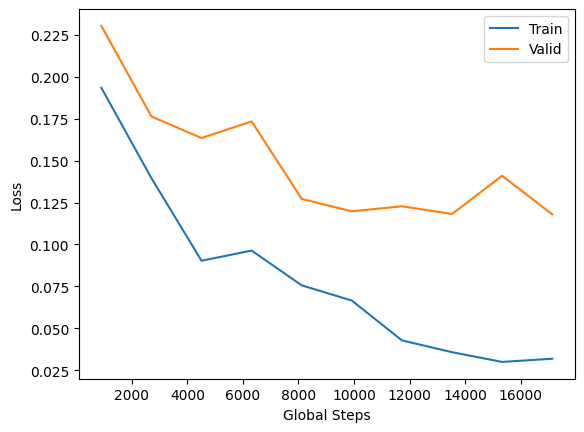

In [ ]:
train_loss_list, valid_loss_list, global_steps_list = load_metrics(destination_folder + '/metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
BATCHSIZE = 32
EPOCHS = 10
N_TRAIN_EXAMPLES = BATCHSIZE *1500
N_VALID_EXAMPLES = BATCHSIZE *500

In [ ]:
def objective_RNN(trial):
    dimension = trial.suggest_int("dimentions{}".format(i),128,256)
    num_layers=trial.suggest_int("n_layers{}".format(i), 2, 5)
    dropout=trial.suggest_float("dropout{}".format(i), 0.2, 0.7,step=0.1,log=False)
    # Generate the model.
    model = RNN_net(dimension=dimension, num_layers=num_layers,dropout=dropout).to(device)

    # Generate the optimizers.
   # lr = trial.suggest_float("lr",0.00001, 0.1, log=False)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion=nn.BCELoss()

    # Training of the model.
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, data in enumerate(train_iter):
          # Limiting training data for faster epochs.
            if batch_idx * BATCHSIZE >= N_TRAIN_EXAMPLES:
                break

            labels = data.labels.to(device)
            text = data.text[0].to(device)

            optimizer.zero_grad()
            output = model(text)
            loss =  criterion(output, labels)
            loss.backward()
            optimizer.step()

        # Validation of the model.
        model.eval()
        valid_running_loss = 0.0
        with torch.no_grad():
            for batch_idx, data in enumerate(test_iter):
                # Limiting validation data.
               # if batch_idx * BATCHSIZE >= N_VALID_EXAMPLES:
                   # break

                labels = data.labels.to(device)
                text = data.text[0].to(device)
                output = model(text)
                loss = criterion(output, labels)
                valid_running_loss += loss.item()


        average_valid_loss = valid_running_loss / len(test_iter)

        trial.report(average_valid_loss, epoch)
        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()



    return average_valid_loss


In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective_RNN, n_trials=10, timeout=float('inf'))

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

[I 2024-02-23 19:28:55,287] A new study created in memory with name: no-name-a80ba315-d616-460c-b1c8-068d121e60f2
[I 2024-02-23 19:47:23,268] Trial 0 finished with value: 0.1710740134641146 and parameters: {'dimentions72133': 213, 'n_layers72133': 5, 'dropout72133': 0.4}. Best is trial 0 with value: 0.1710740134641146.
[I 2024-02-23 19:59:57,600] Trial 1 finished with value: 0.2600319062294067 and parameters: {'dimentions72133': 134, 'n_layers72133': 3, 'dropout72133': 0.7}. Best is trial 0 with value: 0.1710740134641146.
[I 2024-02-23 20:09:57,499] Trial 2 finished with value: 0.39308020070253413 and parameters: {'dimentions72133': 138, 'n_layers72133': 2, 'dropout72133': 0.30000000000000004}. Best is trial 0 with value: 0.1710740134641146.
[I 2024-02-23 20:20:08,500] Trial 3 finished with value: 0.11150223020162302 and parameters: {'dimentions72133': 181, 'n_layers72133': 2, 'dropout72133': 0.30000000000000004}. Best is trial 3 with value: 0.11150223020162302.
[I 2024-02-23 20:35:46,

Study statistics: 
  Number of finished trials:  10
  Number of pruned trials:  4
  Number of complete trials:  6
Best trial:
  Value:  0.11150223020162302
  Params: 
    dimentions72133: 181
    n_layers72133: 2
    dropout72133: 0.30000000000000004


In [ ]:
model = RNN_net(dimension=181, num_layers=2,dropout=0.3).to(device)
optimizer = optim.Adam(model.parameters(), lr= 0.001)

train(model=model, optimizer=optimizer, num_epochs=30)

Epoch [1/30], Step [902/1804], Train Loss: 0.1950, Valid Loss: 0.3601
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [2/30], Step [902/1804], Train Loss: 0.2046, Valid Loss: 0.4610
Epoch [3/30], Step [902/1804], Train Loss: 0.1790, Valid Loss: 0.3355
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [4/30], Step [902/1804], Train Loss: 0.1062, Valid Loss: 0.2200
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [5/30], Step [902/1804], Train Loss: 0.0972, Valid Loss: 0.3143
Epoch [6/30], Step [902/1804], Train Loss: 0.0714, Valid Loss: 0.1365
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [7/30], Step [902/1804], Train Loss: 0.0460, Valid Loss: 0.1954
Epoch [8/30], Step [902/1804], Train Loss: 0.0302, Valid Loss: 0.1525
Epoch [9/30], Step [902/1804], Train Loss: 0.0318, Valid Loss: 0.1401
Epoch [10/30], Step [902/1804], Train Loss: 0.0312

Metrics loaded from <== /content//metrics.pt


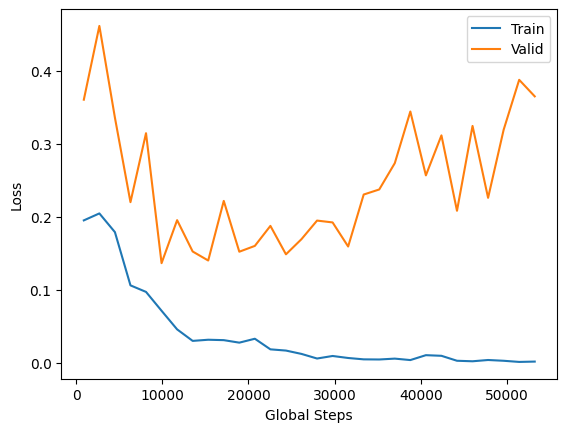

In [ ]:
train_loss_list, valid_loss_list, global_steps_list = load_metrics(destination_folder + '/metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluation Function

def evaluate_model(model, test_loader, version='title', threshold=0.5):
    y_pred = []
    y_true = []

    model.eval()
    with torch.no_grad():

        for batch_idx, data in enumerate(test_loader):
            labels = data.labels.to(device)
            text = data.text[0].to(device)
            output = model(text)


            output = (output > threshold).int()
            y_pred.extend(output.tolist())
            y_true.extend(labels.tolist())

    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=[1,0], digits=4))
    print('accutacy:', accuracy_score(y_true, y_pred))
    print('precision_score:',precision_score(y_true, y_pred))
    print('recall_score:',recall_score(y_true, y_pred))
    print('f1_score:',f1_score(y_true, y_pred))


    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

    ax.set_title('Confusion Matrix')

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

    ax.xaxis.set_ticklabels(['FAKE', 'REAL'])
    ax.yaxis.set_ticklabels(['FAKE', 'REAL'])

Model loaded from <== /content//model.pt
Classification Report:
              precision    recall  f1-score   support

           1     0.9586    0.9364    0.9473      7338
           0     0.9357    0.9581    0.9468      7089

    accuracy                         0.9470     14427
   macro avg     0.9471    0.9472    0.9470     14427
weighted avg     0.9473    0.9470    0.9470     14427

accutacy: 0.9470437374367505
precision_score: 0.9585658482142857
recall_score: 0.9363586808394658
f1_score: 0.9473321384254791


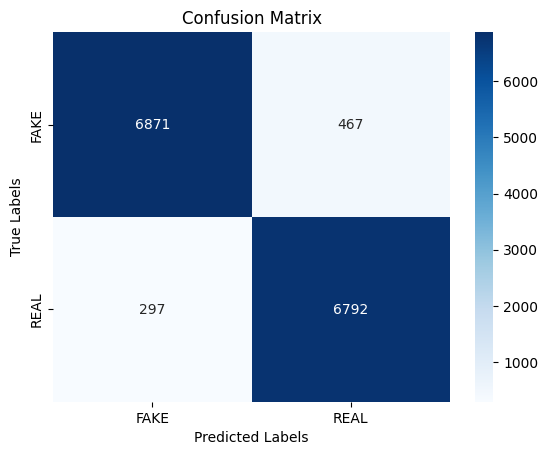

In [ ]:
best_model = RNN_net(dimension=181, num_layers= 2,dropout=0.3).to(device)
optimizer = optim.Adam(model.parameters(), lr= 0.001)

load_checkpoint(destination_folder + '/model.pt', best_model, optimizer)
evaluate_model(best_model, test_iter)

In [ ]:
model = RNN_net(dimension=256, num_layers=2,dropout=0.5).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

train(model=model, optimizer=optimizer, num_epochs=30)

Epoch [1/30], Step [902/1804], Train Loss: 0.2010, Valid Loss: 0.2305
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [2/30], Step [902/1804], Train Loss: 0.1443, Valid Loss: 0.2737
Epoch [3/30], Step [902/1804], Train Loss: 0.1365, Valid Loss: 0.1787
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [4/30], Step [902/1804], Train Loss: 0.1103, Valid Loss: 0.1762
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [5/30], Step [902/1804], Train Loss: 0.0654, Valid Loss: 0.1317
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [6/30], Step [902/1804], Train Loss: 0.0909, Valid Loss: 0.1363
Epoch [7/30], Step [902/1804], Train Loss: 0.0833, Valid Loss: 0.5878
Epoch [8/30], Step [902/1804], Train Loss: 0.0937, Valid Loss: 0.1733
Epoch [9/30], Step [902/1804], Train Loss: 0.0510, Valid Loss: 0.1224
Model saved to ==> /content//model.pt
Metrics save

Metrics loaded from <== /content//metrics.pt


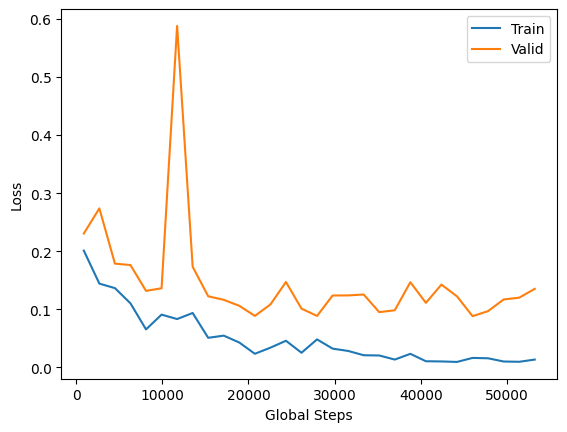

In [ ]:
train_loss_list, valid_loss_list, global_steps_list = load_metrics(destination_folder + '/metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model loaded from <== /content//model.pt
Classification Report:
              precision    recall  f1-score   support

           1     0.9799    0.9809    0.9804      7338
           0     0.9802    0.9791    0.9797      7089

    accuracy                         0.9800     14427
   macro avg     0.9800    0.9800    0.9800     14427
weighted avg     0.9800    0.9800    0.9800     14427

accutacy: 0.9800374298190893
precision_score: 0.9798529812142662
recall_score: 0.9809212319433088
f1_score: 0.9803868155815855


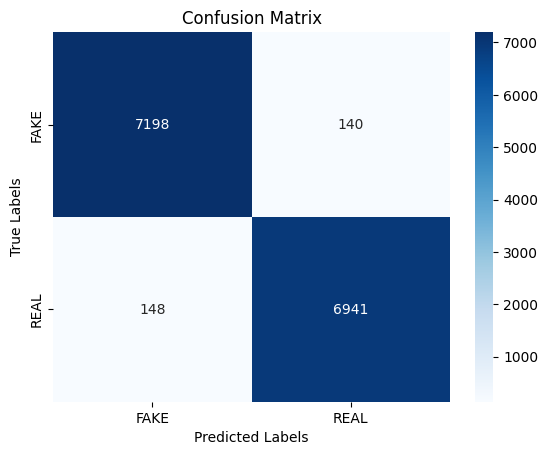

In [ ]:
best_model = RNN_net(dimension=256, num_layers=2,dropout=0.5).to(device)
optimizer = optim.Adam(best_model.parameters(), lr=0.001)

load_checkpoint(destination_folder + '/model.pt', best_model, optimizer)
evaluate_model(best_model, test_iter)

In [ ]:
class LSTM_net(nn.Module):
    def __init__(self, dimension=128,num_layers_1=3,num_layers_2=1,dropout_1=0.5,dropout_2=0.5):
        super().__init__()

        # Embedding layer for text
        self.embedding = nn.Embedding(len(text_field.vocab), 300)
        self.dimension = dimension
        self.num_layers_1=num_layers_1
        self.num_layers_2=num_layers_2
        self.dropout_1=dropout_1
        self.dropout_2=dropout_2


        # First LSTM layer
        self.lstm1 = nn.LSTM(input_size=300, hidden_size=dimension, num_layers=num_layers_1,
                             batch_first=True, bidirectional=True)
        self.dropout1 = nn.Dropout(p=dropout_1)

        # Second LSTM layer
        self.lstm2 = nn.LSTM(input_size= 2*dimension, hidden_size=dimension, num_layers=num_layers_2,
                             batch_first=True, bidirectional=True,dropout=dropout_2)


        # Fully connected layer for final output
        self.fc = nn.Linear(2 * dimension, 1)

    def forward(self, text):
        # Embedding the text
        #print(f'Input: {list(text.shape)}')
        text_len = torch.tensor([len(seq) for seq in text], dtype=torch.int64)


        text_emb = self.embedding(text)

        # First LSTM layer
        packed_input_1 = pack_padded_sequence(text_emb, text_len, batch_first=True, enforce_sorted=False)
        packed_output_1, _ = self.lstm1(packed_input_1)
        output_1, _ = pad_packed_sequence(packed_output_1, batch_first=True)

        # Extracting the last forward and first backward outputs from the first LSTM layer
        last_forward_output_1 = output_1[range(len(output_1)), text_len - 1, :self.dimension]
        first_backward_output_1 = output_1[:, 0, self.dimension:]

        # Concatenating the forward and backward outputs
        concatenated_output_1 = torch.cat((last_forward_output_1, first_backward_output_1), 1)

        # Applying dropout after the first LSTM layer
        dropout_output_1 = self.dropout1(concatenated_output_1)

        #print(f'First block: {list(dropout_output_1.shape)}')

        # Second LSTM layer
        output_2, _ = self.lstm2(dropout_output_1)





        text = self.fc(output_2)
        text = torch.squeeze(text, 1)
        text_out = torch.sigmoid(text)
        #print(f'First block: {list(text_out.shape)}')

        return text_out


In [ ]:
model = LSTM_net().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

train(model=model, optimizer=optimizer, num_epochs=10)

Epoch [1/10], Step [902/1804], Train Loss: 0.1284, Valid Loss: 0.0967
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [2/10], Step [902/1804], Train Loss: 0.0308, Valid Loss: 0.0375
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [3/10], Step [902/1804], Train Loss: 0.0182, Valid Loss: 0.0275
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [4/10], Step [902/1804], Train Loss: 0.0114, Valid Loss: 0.0219
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [5/10], Step [902/1804], Train Loss: 0.0044, Valid Loss: 0.0147
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [6/10], Step [902/1804], Train Loss: 0.0031, Valid Loss: 0.0137
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [7/10], Step [902/1804], Train Loss: 0.0032, Valid Loss: 0.0161
Epoch [8/10], Step [902/1804],

Metrics loaded from <== /content//metrics.pt


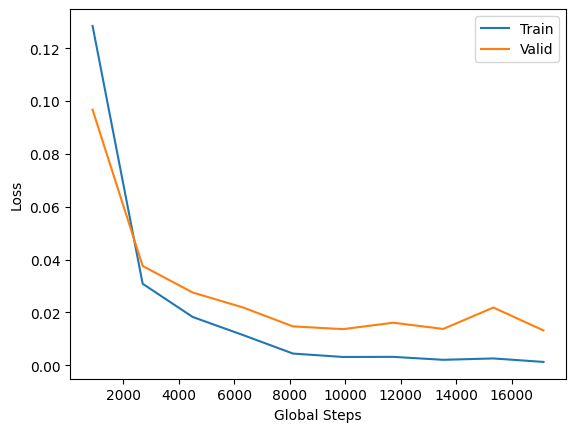

In [ ]:
train_loss_list, valid_loss_list, global_steps_list = load_metrics(destination_folder + '/metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model loaded from <== /content//model.pt
Classification Report:
              precision    recall  f1-score   support

           1     0.9969    0.9974    0.9971      7338
           0     0.9973    0.9968    0.9970      7089

    accuracy                         0.9971     14427
   macro avg     0.9971    0.9971    0.9971     14427
weighted avg     0.9971    0.9971    0.9971     14427

accutacy: 0.9970887918486172
precision_score: 0.9968673385998366
recall_score: 0.9974107386208776
f1_score: 0.9971389645776566


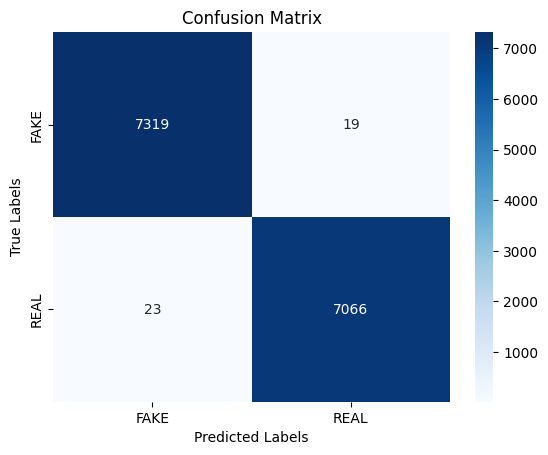

In [ ]:
best_model = LSTM_net().to(device)
optimizer = optim.Adam(best_model.parameters(), lr=0.001)

load_checkpoint(destination_folder + '/model.pt', best_model, optimizer)
evaluate_model(best_model, test_iter)

In [ ]:
EPOCHS = 10
def objective(trial):
    dimension = trial.suggest_int("dimentions{}".format(i),128,200)
    num_layers_1=trial.suggest_int("n_layers_l{}".format(i), 2, 5)
    num_layers_2=trial.suggest_int("n_layers_2{}".format(i), 2, 5)
    dropout_1=trial.suggest_float("dropout_l{}".format(i), 0.2, 0.7,step=0.1)
    dropout_2=trial.suggest_float("dropout_2{}".format(i), 0.2, 0.7,step=0.1)
    # Generate the model.
    model = LSTM_net(dimension,num_layers_1,num_layers_2,dropout_1,dropout_2).to(device)

    # Generate the optimizers.
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion=nn.BCELoss()

    # Training of the model.
    for epoch in range(EPOCHS):
        model.train()
        for batch_idx, data in enumerate(train_iter):



            labels = data.labels.to(device)
            text = data.text[0].to(device)

            optimizer.zero_grad()
            output = model(text)
            loss =  criterion(output, labels)
            loss.backward()
            optimizer.step()

        # Validation of the model.
        model.eval()
        valid_running_loss = 0.0
        with torch.no_grad():
            for batch_idx, data in enumerate(test_iter):
                # Limiting validation data.

                labels = data.labels.to(device)
                text = data.text[0].to(device)
                output = model(text)
                loss = criterion(output, labels)
                valid_running_loss += loss.item()


        average_valid_loss = valid_running_loss / len(test_iter)

        trial.report(average_valid_loss, epoch)



    return average_valid_loss


In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=3, timeout=float('inf'))

complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

[I 2024-02-17 22:01:03,324] A new study created in memory with name: no-name-b708b18f-fdd6-4973-8183-9209de20425f
[I 2024-02-17 22:27:21,028] Trial 0 finished with value: 0.15258953111648133 and parameters: {'dimentions72133': 147, 'n_layers_l72133': 3, 'n_layers_272133': 2, 'dropout_l72133': 0.6000000000000001, 'dropout_272133': 0.30000000000000004, 'lr': 3.423808250293583e-05}. Best is trial 0 with value: 0.15258953111648133.
[I 2024-02-17 22:46:05,005] Trial 1 finished with value: 0.0989378040973363 and parameters: {'dimentions72133': 130, 'n_layers_l72133': 2, 'n_layers_272133': 2, 'dropout_l72133': 0.30000000000000004, 'dropout_272133': 0.2, 'lr': 0.006581760130257569}. Best is trial 1 with value: 0.0989378040973363.
[I 2024-02-17 23:07:45,960] Trial 2 finished with value: 0.06716755297869827 and parameters: {'dimentions72133': 166, 'n_layers_l72133': 2, 'n_layers_272133': 2, 'dropout_l72133': 0.30000000000000004, 'dropout_272133': 0.4, 'lr': 0.0010031433840987135}. Best is trial 

Study statistics: 
  Number of finished trials:  3
  Number of complete trials:  3
Best trial:
  Value:  0.06716755297869827
  Params: 
    dimentions72133: 166
    n_layers_l72133: 2
    n_layers_272133: 2
    dropout_l72133: 0.30000000000000004
    dropout_272133: 0.4
    lr: 0.0010031433840987135


In [ ]:
final_Lstm_model = LSTM_net(dimension=166,num_layers_1=2,num_layers_2=2,dropout_1=0.30000000000000004,dropout_2=0.4).to(device)
optimizer = optim.Adam(final_Lstm_model.parameters(), lr=0.0010031433840987135)

train(model=final_Lstm_model, optimizer=optimizer, num_epochs=10)

Epoch [1/10], Step [902/1804], Train Loss: 0.2027, Valid Loss: 0.1618
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [2/10], Step [902/1804], Train Loss: 0.0427, Valid Loss: 0.0573
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [3/10], Step [902/1804], Train Loss: 0.0187, Valid Loss: 0.0540
Model saved to ==> /content//model.pt
Metrics saved to ==> /content//metrics.pt
Epoch [4/10], Step [902/1804], Train Loss: 0.0146, Valid Loss: 0.0570
Epoch [5/10], Step [902/1804], Train Loss: 0.0103, Valid Loss: 0.0615
Epoch [6/10], Step [902/1804], Train Loss: 0.0063, Valid Loss: 0.0551
Epoch [7/10], Step [902/1804], Train Loss: 0.0050, Valid Loss: 0.0776
Epoch [8/10], Step [902/1804], Train Loss: 0.0031, Valid Loss: 0.0712
Epoch [9/10], Step [902/1804], Train Loss: 0.0029, Valid Loss: 0.0652
Epoch [10/10], Step [902/1804], Train Loss: 0.0025, Valid Loss: 0.0884
Metrics saved to ==> /content//metrics.pt
Finished Training

Metrics loaded from <== /content//metrics.pt


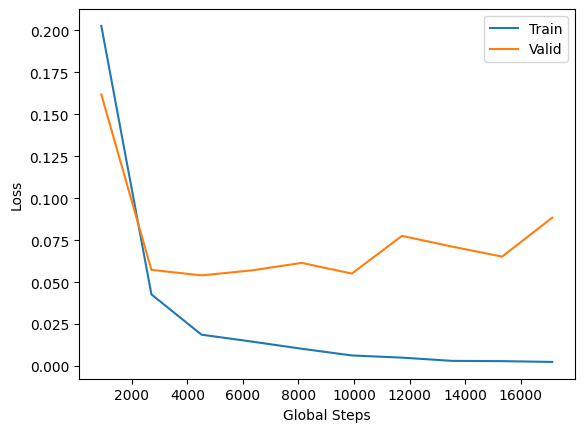

In [ ]:
train_loss_list, valid_loss_list, global_steps_list = load_metrics(destination_folder + '/metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model loaded from <== /content//model.pt
Classification Report:
              precision    recall  f1-score   support

           1     0.9893    0.9790    0.9841      7338
           0     0.9785    0.9890    0.9837      7089

    accuracy                         0.9839     14427
   macro avg     0.9839    0.9840    0.9839     14427
weighted avg     0.9840    0.9839    0.9839     14427

accutacy: 0.9839190406875996
precision_score: 0.989259157256954
recall_score: 0.9790133551376397
f1_score: 0.9841095890410959


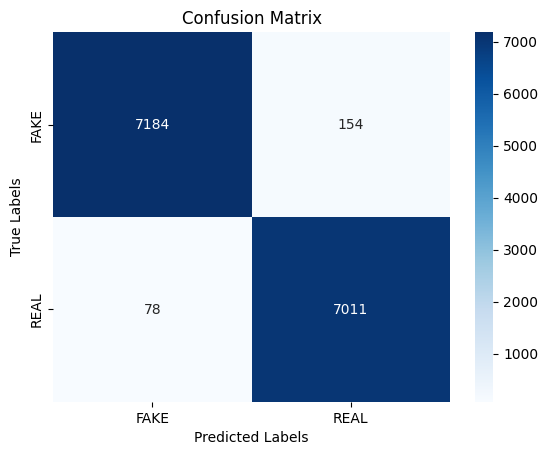

In [ ]:
best_Lstm_model = LSTM_net(dimension=166,num_layers_1=2,num_layers_2=2,dropout_1=0.3,dropout_2=0.4).to(device)
optimizer = optim.Adam(final_Lstm_model.parameters(), lr=0.001)

load_checkpoint(destination_folder + '/model.pt',best_Lstm_model, optimizer)
evaluate_model(best_Lstm_model, test_iter)

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokenizer

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

BertTokenizerFast(name_or_path='bert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
data_files = {"train": "train.csv", "test": "test.csv"}
dataset = load_dataset("/content/", data_files=data_files)

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 57707
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 14427
    })
})

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/57707 [00:00<?, ? examples/s]

Map:   0%|          | 0/14427 [00:00<?, ? examples/s]

In [ ]:
label2id={"Fake":1, "Real":0}
id2label={1:"Fake", 0:"Real"}

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased",
                                                           num_labels=2,
                                                           label2id=label2id,
                                                           id2label=id2label)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

<ipython-input-35-56b0b4182bac>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:756: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
def compute_metrics(eval_pred):


   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = np.mean(predictions==labels)
   return {"accuracy": accuracy}


In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer",
                                  evaluation_strategy="epoch"  ,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=8,
                                  per_device_eval_batch_size=32,
                                  num_train_epochs=5,
                                  warmup_steps = 50,
                                  weight_decay=0.01,
                                  save_strategy="epoch",
                                  load_best_model_at_end=True,)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy
1,0.023100,0.018704,0.996049
2,0.007100,0.017284,0.996465
3,0.001300,0.020090,0.997366


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


TrainOutput(global_step=10821, training_loss=0.018939773588697875, metrics={'train_runtime': 10078.5188, 'train_samples_per_second': 17.177, 'train_steps_per_second': 1.074, 'total_flos': 4.555004901497856e+16, 'train_loss': 0.018939773588697875, 'epoch': 3.0})

In [ ]:
metrics = trainer.evaluate()
# some nice to haves:
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


***** eval metrics *****
  epoch                   =        3.0
  eval_accuracy           =     0.9965
  eval_loss               =     0.0173
  eval_runtime            = 0:04:31.01
  eval_samples_per_second =     53.234
  eval_steps_per_second   =      0.834
